# Esperanza de vida en la ciudad de València

Esperanza de vida en la ciudad de València de los años 2009 a 2021 y clasificada por sexo y distrito.

In [211]:
%pip install seaborn

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

El dataset se ha obtenido del catalogo de datasets del Gobierno de España: https://datos.gob.es/en/catalogo/l01462508-oe28-esperanza-vida

In [213]:
from js import fetch
import io

URL = "https://valencia.opendatasoft.com/api/v2/catalog/datasets/oe_28_esperanza_vida/exports/csv"
resp = await fetch(URL)
dataset_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
espvida_vlc_df = pd.read_csv(dataset_csv, sep=";")
espvida_vlc_df.head()

,id,ano,sexo,distrito,valor,fecha_creacion,fecha_baja
0,6,2009,Ambos,EXTRAMURS,82.19,2023-07-02,NaN
1,10,2009,Ambos,L'OLIVERETA,80.93,2023-07-02,NaN
2,12,2009,Ambos,JESUS,81.49,2023-07-02,NaN
3,13,2009,Ambos,QUATRE CARRERES,81.33,2023-07-02,NaN
4,18,2009,Ambos,RASCANYA,81.14,2023-07-02,NaN


## Preprocesado

In [214]:
espvida_vlc_df.rename(columns={"ano": "año", "valor": "esperanza de vida"}, inplace=True)
espvida_vlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 286 non-null    int64  
 1   año                286 non-null    int64  
 2   sexo               286 non-null    object 
 3   distrito           286 non-null    object 
 4   esperanza de vida  286 non-null    float64
 5   fecha_creacion     286 non-null    object 
 6   fecha_baja         0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.4+ KB


In [215]:
unique_values = espvida_vlc_df.apply(lambda x: x.unique())
unique_values

id                   [6, 10, 12, 13, 18, 23, 25, 26, 30, 31, 37, 43...
año                  [2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...
sexo                                         [Ambos, Mujeres, Hombres]
distrito             [EXTRAMURS, L'OLIVERETA, JESUS, QUATRE CARRERE...
esperanza de vida    [82.19, 80.93, 81.49, 81.33, 81.14, 81.73, 84....
fecha_creacion                                            [2023-07-02]
fecha_baja                                                       [nan]
dtype: object

Vemos que la columna "fecha_baja" tiene todo valores nulos, así que la eliminamos. Además, la columna de "fecha_creacion" es de tipo object en vez de DateTime, así que sería conveniente convertirla. Sin embargo, si nos fijamos, vemos que todas tienen el mismo valor así que la eliminamos también. La columna "id" tampoco nos aporta nada.

In [216]:
espvida_vlc_df = espvida_vlc_df.drop(["fecha_baja", "fecha_creacion", "id"], axis=1)

In [217]:
espvida_vlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   año                286 non-null    int64  
 1   sexo               286 non-null    object 
 2   distrito           286 non-null    object 
 3   esperanza de vida  286 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


## Análisis descriptivo

In [218]:
espvida_vlc_df.describe()

,año,esperanza de vida
count,286.000000,286.000000
mean,2015.000000,82.857692
std,3.748216,1.389495
min,2009.000000,78.040000
25%,2012.000000,82.045000
50%,2015.000000,82.950000
75%,2018.000000,83.645000
max,2021.000000,86.510000


In [219]:
espvida_vlc_df.describe(include=['object'])

,sexo,distrito
count,286,286
unique,3,19
top,Ambos,Todos
freq,260,39


### Esperanza de vida según el distrito

El primer análisis que vamos a realizar es el de la esperanza de vida por distrito. Primero vamos a ver qué distritos hay:

In [220]:
espvida_vlc_df['distrito'].unique()

array(['EXTRAMURS', "L'OLIVERETA", 'JESUS', 'QUATRE CARRERES', 'RASCANYA',
       'Todos', 'CIUTAT VELLA', 'LA SAIDIA', 'EL PLA DEL REAL',
       'CAMINS AL GRAU', "POBLATS DE L'OEST", 'PATRAIX', 'BENIMACLET',
       "L'EIXAMPLE", 'CAMPANAR', 'ALGIROS', 'BENICALAP',
       'POBLATS DEL NORD', 'POBLATS MARITIMS'], dtype=object)

Como vemos, hay un total de 19 distritos en Valencia con un valor que agrupa a todos. Vamos a agruparlo en función del valor medio de la esperanza de vida en cada uno:

In [221]:
group_df = espvida_vlc_df[['esperanza de vida', 'distrito']]
by_dist_df = group_df.groupby(['distrito'], as_index=False).mean()
by_dist_df.sort_values('esperanza de vida', ascending=False, inplace=True, ignore_index=True)
by_dist_df

,distrito,esperanza de vida
0,EL PLA DEL REAL,84.815833
1,BENIMACLET,83.705385
2,CAMPANAR,83.639231
3,L'EIXAMPLE,83.626154
4,EXTRAMURS,83.597692
5,ALGIROS,83.364615
6,PATRAIX,83.205385
7,CAMINS AL GRAU,82.993077
8,LA SAIDIA,82.948462
9,JESUS,82.885385


Al agrupar los distritos y el valor medio de la esperanza vida en cada uno, obtenemos que los tres distritos con un valor más alto son: El pla del real, Benimaclet y Campanar.

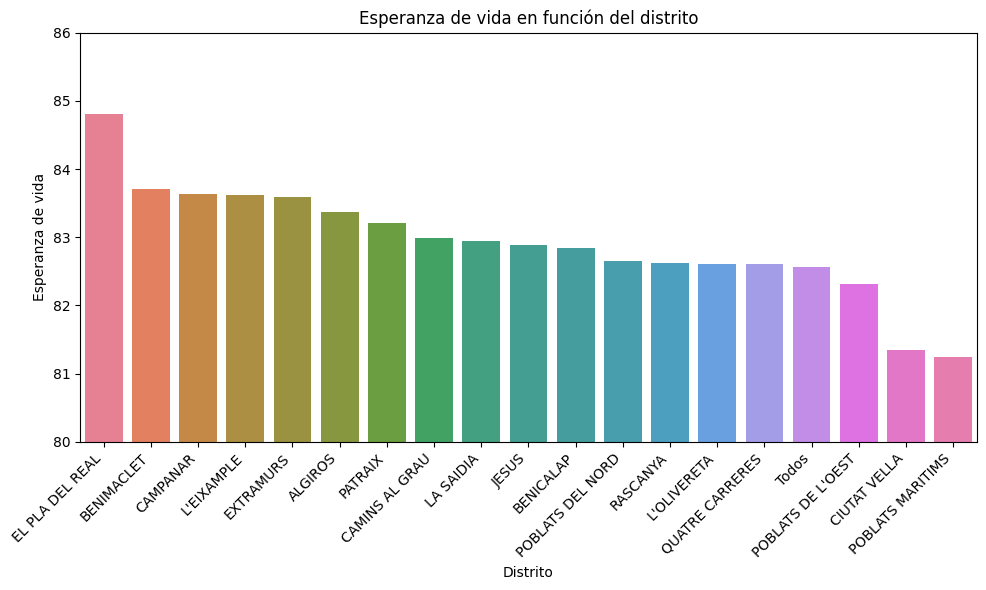

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x='distrito', y='esperanza de vida', hue='distrito', data=by_dist_df)
plt.xlabel('Distrito')
plt.ylabel('Esperanza de vida')
plt.title('Esperanza de vida en función del distrito')
plt.ylim(bottom=80, top=86)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Mostrar los datos en un mapa

In [227]:
import piplite
await piplite.install(['folium'])

import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

Lo primero que vamos a hacer es añadir dos nuevas columnas, representando la latitud y longitud de cada distrito

In [252]:
by_dist_df['lat'] = [39.4758, 39.485, 39.4827, 39.4647, 39.4687, 39.471944, 39.4594, 39.4597, 39.4833, 39.448, 39.4923, 39.5164, 39.4926, 39.4642, 39.452, 39.46975, 39.5023, 39.473, 39.4633]
by_dist_df['lon'] = [-0.360019, -0.362, -0.390919, -0.37, -0.387142,  -0.345278, -0.391606, -0.344228, -0.372036, -0.391606, -0.390233, -0.3868, -0.367464, -0.404653, -0.362486, -0.37739, -0.417589, -0.3765, -0.326953]
by_dist_df

,distrito,esperanza de vida,lat,lon
0,EL PLA DEL REAL,84.815833,39.475800,-0.360019
1,BENIMACLET,83.705385,39.485000,-0.362000
2,CAMPANAR,83.639231,39.482700,-0.390919
3,L'EIXAMPLE,83.626154,39.464700,-0.370000
4,EXTRAMURS,83.597692,39.468700,-0.387142
5,ALGIROS,83.364615,39.471944,-0.345278
6,PATRAIX,83.205385,39.459400,-0.391606
7,CAMINS AL GRAU,82.993077,39.459700,-0.344228
8,LA SAIDIA,82.948462,39.483300,-0.372036
9,JESUS,82.885385,39.448000,-0.391606


El siguiente paso es crear el mapa de Folium, añadiremos un marcador por distrito y un popup con el valor de la esperanza de vida correspondiente

In [296]:
vlc_map = folium.Map(location=[39.46975, -0.37739], zoom_start=13 )

In [297]:
def add_in_map(row):
    district_coords = [row['lat'], row['lon']]
    esperanza_vida = round(row['esperanza de vida'], 2)
    marker = folium.map.Marker(
        location=district_coords,
        popup=esperanza_vida,
        icon=DivIcon(
            icon_size=(200,200),
            icon_anchor=(0,0),
            html='<div style="font-size: 24; font-weight:900; color: black;"><b>%s</b></div>' % row['distrito'],
        )
    )
    vlc_map.add_child(marker)
by_dist_df.apply(add_in_map, axis=1)
vlc_map

### Esperanza de vida a lo largo del tiempo

In [298]:
by_año_df = espvida_vlc_df.groupby(['año'], as_index=False).mean()
by_año_df.sort_values('esperanza de vida', ascending=False, inplace=True, ignore_index=True)
by_año_df

<ipython-input-298-bff3a821297a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_año_df = espvida_vlc_df.groupby(['año'], as_index=False).mean()


,año,esperanza de vida
0,2021,83.880000
1,2019,83.799091
2,2018,83.526364
3,2017,83.279091
4,2016,83.184545
5,2020,83.132727
6,2015,83.079545
7,2014,82.856364
8,2013,82.579091
9,2012,82.344091


Del listado anterior vemos un dato curioso, y es que la esperanza de vida creció hasta el año 2019, después bajó en 2020 coincidiendo con el Covid-19. Podemos observar esta caída en un gráfico:

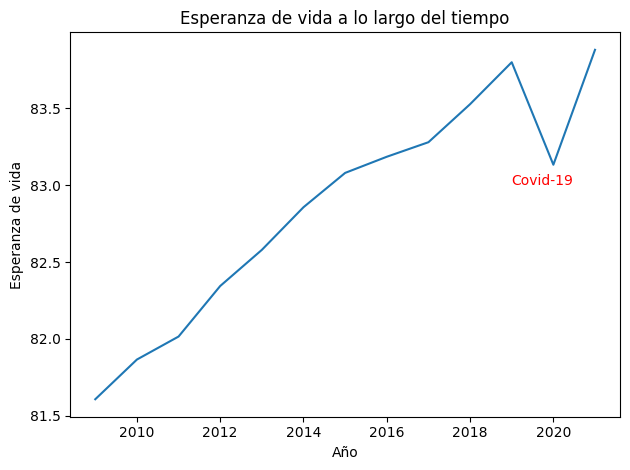

In [299]:
sns.lineplot(x='año', y='esperanza de vida', data=by_año_df)
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.title('Esperanza de vida a lo largo del tiempo')
plt.text(2019, 83, 'Covid-19', fontsize=10, color='red')
plt.tight_layout()
plt.show()

### Esperanza de vida según el sexo

In [307]:
by_sexo_df = espvida_vlc_df[['sexo', 'esperanza de vida']].groupby(['sexo'], as_index=False).mean()
by_sexo_df.sort_values('esperanza de vida', ascending=False, inplace=True, ignore_index=True)
by_sexo_df

,sexo,esperanza de vida
0,Mujeres,85.403077
1,Ambos,82.892846
2,Hombres,79.609231


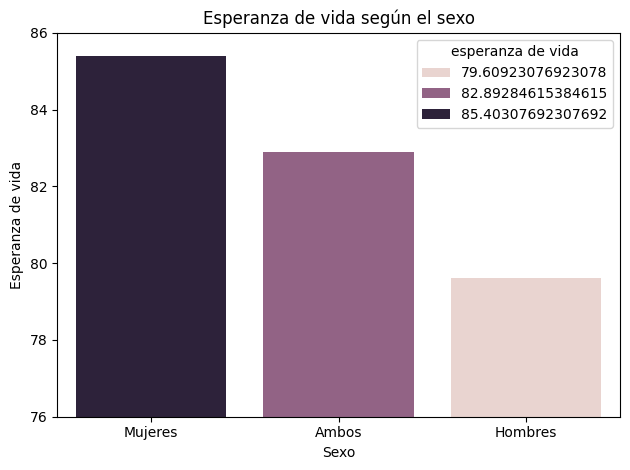

In [316]:
sns.barplot(x='sexo', y='esperanza de vida', hue='esperanza de vida', data=by_sexo_df)
plt.xlabel('Sexo')
plt.ylabel('Esperanza de vida')
plt.title('Esperanza de vida según el sexo')
plt.ylim(bottom=76, top=86)
plt.tight_layout()
plt.show()